In [1]:
import os
import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

from run_training import ModelTraining
from data_loader.simple_mtl_data_loader import custom_data_loader
from utils.data_processing import inference_input_processing

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config IPCompleter.greedy=True
import warnings
from IPython.display import display

warnings.filterwarnings("ignore")

/home/robert/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load dataset

In [2]:
data = pd.read_csv("../data/data.csv")

### Initialize model parameters and preprocess dataset

In [3]:
N = 900000 # total number of samples
batch_size = 12 # define model training batch size
data_loader_batch_size = int(batch_size / 2) # batch size for each task (number of samples from each task must be equal in final batch)

# Simple manual split to train and validation datasets
## TODO: furhter improvments dynamic train and validation split in one generator
df_train = data.iloc[batch_size:N, :]
df_val = pd.concat([data.iloc[:batch_size, :], data.iloc[N:N + batch_size, :]], ignore_index=True)

# Crate gernerator objects for train and validation
training_data_loader = custom_data_loader(df_train, batchSize=data_loader_batch_size)
validation_data_loader = custom_data_loader(df_val, batchSize=data_loader_batch_size)


### Build and train model

2022-09-28 15:38:42.140800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 15:38:42.142667: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/70
5/5 - 1s - loss: 12.0117 - task_1_loss: 0.2090 - task_2_loss: 118.2365 - task_1_accuracy: 0.9500 - task_2_accuracy: 0.5000 - val_loss: 29.7794 - val_task_1_loss: 0.2411 - val_task_2_loss: 295.6244 - val_task_1_accuracy: 0.8333 - val_task_2_accuracy: 0.5000 - 1s/epoch - 283ms/step
Epoch 2/70
5/5 - 1s - loss: 13.6989 - task_1_loss: 0.1429 - task_2_loss: 135.7034 - task_1_accuracy: 0.9333 - task_2_accuracy: 0.5000 - val_loss: 15.9904 - val_task_1_loss: 0.2279 - val_task_2_loss: 157.8524 - val_task_1_accuracy: 0.8333 - val_task_2_accuracy: 0.5000 - 616ms/epoch - 123ms/step
Epoch 3/70
5/5 - 1s - loss: 13.3287 - task_1_loss: 0.1089 - task_2_loss: 132.3074 - task_1_accuracy: 0.9500 - task_2_accuracy: 0.5000 - val_loss: 22.4300 - val_task_1_loss: 0.0969 - val_task_2_loss: 223.4274 - val_task_1_accuracy: 0.9167 - val_task_2_accuracy: 0.5000 - 585ms/epoch - 117ms/step
Epoch 4/70
5/5 - 0s - loss: 12.6984 - task_1_loss: 0.0622 - task_2_loss: 126.4243 - task_1_accuracy: 0.9833 - task_2_a

Epoch 29/70
5/5 - 1s - loss: 5.0401 - task_1_loss: 0.0297 - task_2_loss: 50.1341 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 3.7044 - val_task_1_loss: 0.0818 - val_task_2_loss: 36.3076 - val_task_1_accuracy: 1.0000 - val_task_2_accuracy: 0.5000 - 581ms/epoch - 116ms/step
Epoch 30/70
5/5 - 0s - loss: 6.7109 - task_1_loss: 0.0210 - task_2_loss: 66.9203 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 5.6699 - val_task_1_loss: 0.0530 - val_task_2_loss: 56.2225 - val_task_1_accuracy: 1.0000 - val_task_2_accuracy: 0.5000 - 491ms/epoch - 98ms/step
Epoch 31/70
5/5 - 0s - loss: 6.3072 - task_1_loss: 0.0292 - task_2_loss: 62.8096 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 6.3244 - val_task_1_loss: 0.0846 - val_task_2_loss: 62.4823 - val_task_1_accuracy: 1.0000 - val_task_2_accuracy: 0.5000 - 348ms/epoch - 70ms/step
Epoch 32/70
5/5 - 1s - loss: 3.5095 - task_1_loss: 0.0230 - task_2_loss: 34.8879 - task_1_accuracy: 1.0000 - task_2_accuracy: 

Epoch 58/70
5/5 - 0s - loss: 3.6180 - task_1_loss: 0.0099 - task_2_loss: 36.0911 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 5.5481 - val_task_1_loss: 0.6033 - val_task_2_loss: 50.0520 - val_task_1_accuracy: 0.8333 - val_task_2_accuracy: 0.5000 - 413ms/epoch - 83ms/step
Epoch 59/70
5/5 - 1s - loss: 3.2101 - task_1_loss: 0.0171 - task_2_loss: 31.9472 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 3.1965 - val_task_1_loss: 0.0905 - val_task_2_loss: 31.1508 - val_task_1_accuracy: 0.9167 - val_task_2_accuracy: 0.5000 - 659ms/epoch - 132ms/step
Epoch 60/70
5/5 - 1s - loss: 5.4434 - task_1_loss: 0.0127 - task_2_loss: 54.3194 - task_1_accuracy: 1.0000 - task_2_accuracy: 0.5000 - val_loss: 5.5604 - val_task_1_loss: 0.6014 - val_task_2_loss: 50.1906 - val_task_1_accuracy: 0.8333 - val_task_2_accuracy: 0.5000 - 584ms/epoch - 117ms/step
Epoch 61/70
5/5 - 0s - loss: 9.0751 - task_1_loss: 0.0150 - task_2_loss: 90.6157 - task_1_accuracy: 1.0000 - task_2_accuracy:

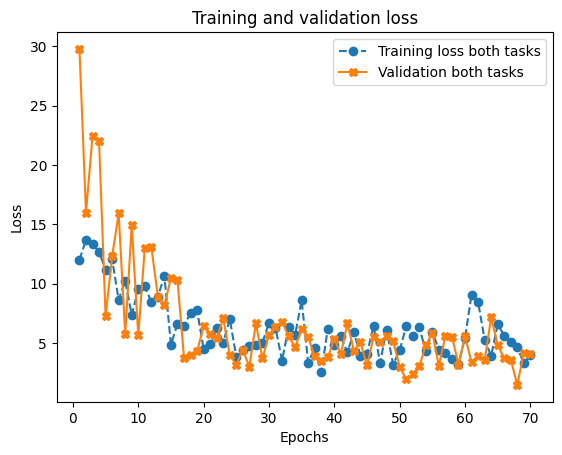

In [4]:
# Define model class object
MTL_model = ModelTraining(training_data_loader, validation_data_loader, epochs=70)
# Train model
MTL_model.train()


## Model architecture
Some explanation:
1. Input: $[x_1, x_2, x_3, x_4, x_5, x_6, z, mask_1, mask_2]$ (mask flags are generated in batch generation step)
2. Input is sliced into two masks (separate for each task), $z$ and $X = [x_1, x_2, ..., x_6]$
3. $X \cdot b_1$ is a shared layer which is mostly affected by task 2 weights update, as the output of task 2 is directly connected to this layer
4. For task 1, $X \cdot b_1$ is added up with $z$, also linear transformation was performed (thats how we get $b_3$ and $b_4$ coefficients)
5. Sigmoid activation is applied to get task 1 output
6. The output of task 1 and task 2 are respectively multiplied by a *mask* vector, where the vector elements of the corresponding task are masked to avoid affecting the loss calculation
7. The loss for each task is calculated separately and finally summed and the weights are updated

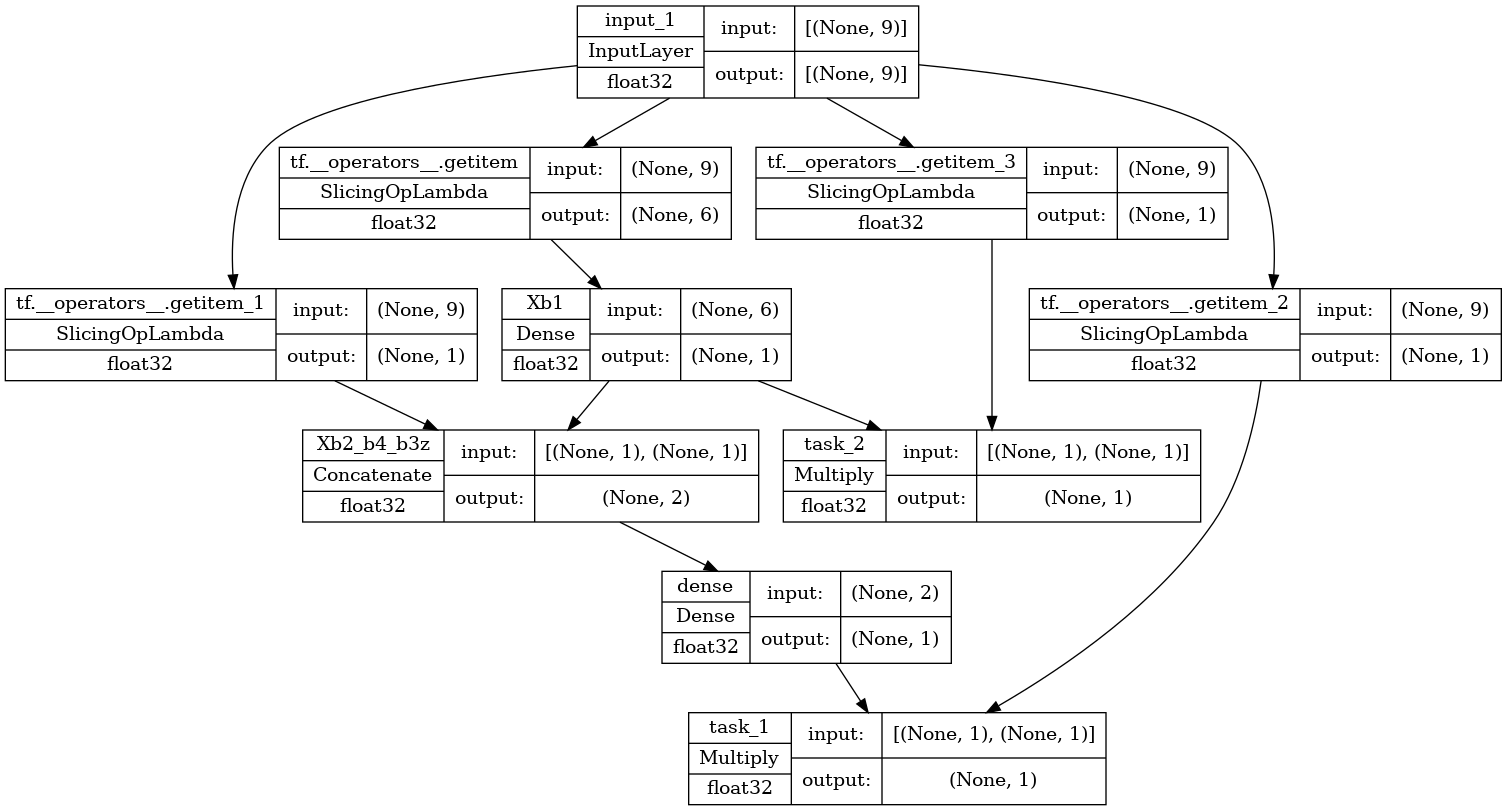

In [5]:
keras.utils.plot_model(MTL_model.model, show_dtype=True, show_layer_names=True, show_shapes=True)

### Estimated $B_1, B_2, b_3, b_4$ coefficients:
Corresponding to the condition $B_2 = b_4 \cdot B1$

In [6]:
MTL_model._get_model_params()

 B1:
 [[2.056399  ]
 [2.1570575 ]
 [1.836812  ]
 [1.9710749 ]
 [0.92870075]
 [1.7867014 ]]
 B2:
 [[1.8668638 ]
 [1.9582448 ]
 [1.6675158 ]
 [1.7894039 ]
 [0.84310377]
 [1.6220238 ]]
 b3:	 [1.4234502]
 b4:	 [0.9078315]


## Task 1 accuracy convergence plot
The graph shows that the accuracy of the model converges to 1 for both train and validation data sets. Of course, it should be noted that the task 1 dataset consists of only 30 samples and the same 12 samples from task 1 and 12 from task 2 are always used for validation, so it is likely that the model will eventually overfit, but the results are still better than using a simple logistic regression on 30 samples

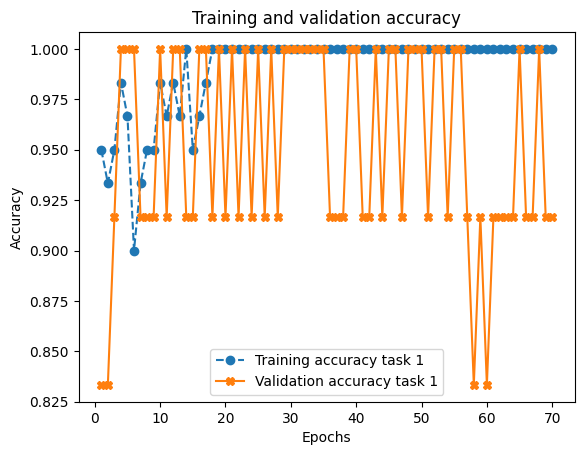

In [7]:
MTL_model.plot_task1_acc()
plt.show()

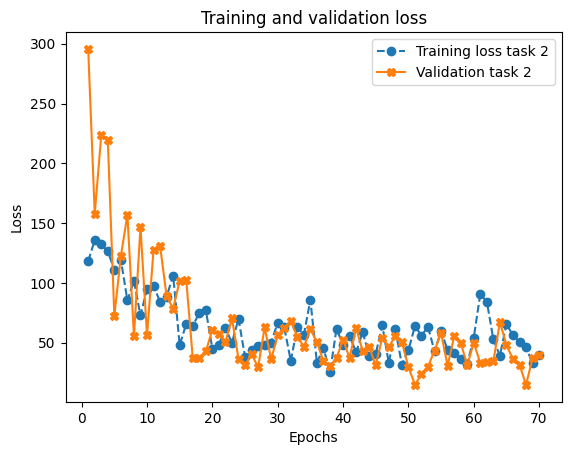

In [8]:
MTL_model.plot_task2_loss()
plt.show()

## Inference
During the inference step input is $[x_1, x_2, x_3, x_4, x_5, x_6, z]$ and model gives two outputs (one for each task)

In [9]:
def predict(input_data: np.array, model=MTL_model) -> None:
    input_df = pd.DataFrame(data=[input_data], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'z'])
    X = inference_input_processing(input_df)
    
    model.inference(X)

In [10]:
predict(input_data=[5.62, 1.26, -0.49, 6.63, 3.77, -0.13, -0.91])

1/1 [==============================] - 0s 101ms/step
Task 1 prediction: 1 
Task 2 prediction: 29.757


## Further improvements
This model is made for learning purposes, so it is one of the simpler versions with a basic functionality, possible improvements:
1. Write custom loss functions for each task
2. Write a custom training step function and adaptively change the learning rate during training
3. Fine tune model hyperparamters
4. Adaptively change the loss weights for each task depending on the epoch, e.g. start with a higher loss weight in task 2 and a lower loss weight in task 1 and gradually change the ratio, i.e. decrease the loss weight of task 2 and increase the loss weight of task 1. In this way, the model could generalize better
5. Refactor the training pipeline so that the training parameters can be passed via a config file, that would give more control over model parameters
6. Try upsampling techniques for task 1 dataset (e.g. SMOTE)